In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Leitura dos Dados

In [2]:
ATRIBUTOS = tuple(["Data", "Partida", "Nome", "Nota", "Area", "Posição", "Min", "Gols", "Assist.", "Pênalti recebido", 
                "Total de chutes", "Chutes no gol", "Chutes para fora", "Trave", "Chutes interceptados", "Chances perdidas", 
                "Impedimentos", "Passes decisivos", "Quase gol", "Passes completados", "Passes longos completados", 
                "Cruzamentos completos", "Dribles completos", "Toques", "Faltas recebidas", "Pênalti cometido", "Faltas cometidas", 
                "Posse de bola perdida", "Driblado", "Perigo afastado", "Interceptações", "Bolas recuperadas", 
                "Vitória em duelos por baixo", "Vitória em duelos por cima", "Defesas", "Gols sofridos", "Pênalti defendido",
                "Reposição de soco", "Erros que terminaram em chute adversário", "Defesa pelo alto", "Seleção"])

df = pd.read_table("./data/def.txt", sep = ';', decimal=".",header=None, names=ATRIBUTOS, parse_dates=['Data'], dayfirst=True)
df

,Data,Partida,Nome,Nota,Area,Posição,Min,Gols,Assist.,Pênalti recebido,...,Bolas recuperadas,Vitória em duelos por baixo,Vitória em duelos por cima,Defesas,Gols sofridos,Pênalti defendido,Reposição de soco,Erros que terminaram em chute adversário,Defesa pelo alto,Seleção
0,2022-11-13,Fulham 1x2 Man Utd,Luke Shaw,7.5,Defesa,Lateral Esquerdo,90,0,0,NaN,...,1/1 (100%),2/5 (40%),1/2 (50%),NaN,NaN,NaN,NaN,NaN,NaN,Inglaterra
1,2022-11-13,Fulham 1x2 Man Utd,Lisandro Martínez,7.4,Defesa,Zagueiro Central,90,0,0,NaN,...,NaN,3/5 (60%),4/5 (80%),NaN,NaN,NaN,NaN,NaN,NaN,Argentina
2,2022-11-13,Fulham 1x2 Man Utd,Tyrell Malacia,6.4,Defesa,Lateral Esquerdo,90,0,0,NaN,...,1/1 (100%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holanda
3,2022-11-13,Fulham 1x2 Man Utd,Christian Eriksen,8.4,Ataque,Meia Atacante,90,1,1,NaN,...,1/1 (100%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dinamarca
4,2022-11-13,Fulham 1x2 Man Utd,Casemiro,7.8,Ataque,Meio de Campo Central,90,0,0,NaN,...,3/3 (100%),5/6 (83%),5/8 (62%),NaN,NaN,NaN,NaN,NaN,NaN,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,2022-09-09,STVV 1x2 Standard,Selim Amallah,7.0,Ataque,Meia Atacante,90,0,1,NaN,...,NaN,8/19 (42%),1/2 (50%),NaN,NaN,NaN,NaN,NaN,NaN,Marrocos
9543,2022-09-03,Standard 1x0 KV Oostende,Selim Amallah,7.2,Ataque,Meia Atacante,90,0,0,NaN,...,2/3 (66.7%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marrocos
9544,2022-08-28,Kortrijk 0x1 Standard,Selim Amallah,7.8,Ataque,Meia Atacante,90,1,0,NaN,...,NaN,6/15 (40%),1/4 (25%),NaN,NaN,NaN,NaN,NaN,NaN,Marrocos
9545,2022-08-13,Westerlo 4x2 Standard,Selim Amallah,5.8,Ataque,Meia Atacante,90,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marrocos


### Limpeza de Dados

In [3]:
def remove_pouco_visto(df:pd.DataFrame, coluna:str, min:int) -> None:
    """
    Função responsável por remover do DataFrame observações que aparecem menos que 'min' na 'coluna'
    Entrada:
        df -> DataFrame pandas
        coluna -> coluna que observaremos
        min -> valor mínimo de observações que devem haver parar manter uma observação
    Saída:
        nenhuma
    """
    observacoes = df[coluna].value_counts()
    # observações fica na forma de uma Série observação(índice) valor 
    pouco_vistos = observacoes[observacoes < min].index
    # coleta o índice dessas observações no DataFrame 
    indices_pv =  df.query(f"{coluna} in {list(pouco_vistos)}").index
    # remove os índices coletados
    df.drop(indices_pv, axis=0, inplace=True)

In [4]:
#Substitui os valores ausentes por zero
df.fillna(0, inplace=True)
#Removemos jogadores que não tiveram atuação passível de nota
df.drop(df.query("Nota == 0").index, inplace=True)
#Removemos os jogadores com menos de 3 jogos observados
remove_pouco_visto(df, "Nome", 3)
#Removemos os paises com menos de 200 observações - restam 26 seleções
remove_pouco_visto(df, "Seleção", 200)
#Reiniciamos os índices
df.reindex(np.arange(len(df)))

,Data,Partida,Nome,Nota,Area,Posição,Min,Gols,Assist.,Pênalti recebido,...,Bolas recuperadas,Vitória em duelos por baixo,Vitória em duelos por cima,Defesas,Gols sofridos,Pênalti defendido,Reposição de soco,Erros que terminaram em chute adversário,Defesa pelo alto,Seleção
0,2022-11-13,Fulham 1x2 Man Utd,Luke Shaw,7.5,Defesa,Lateral Esquerdo,90.0,0.0,0.0,0.0,...,1/1 (100%),2/5 (40%),1/2 (50%),0.0,0.0,0,0.0,0.0,0.0,Inglaterra
1,2022-11-13,Fulham 1x2 Man Utd,Lisandro Martínez,7.4,Defesa,Zagueiro Central,90.0,0.0,0.0,0.0,...,0,3/5 (60%),4/5 (80%),0.0,0.0,0,0.0,0.0,0.0,Argentina
2,2022-11-13,Fulham 1x2 Man Utd,Tyrell Malacia,6.4,Defesa,Lateral Esquerdo,90.0,0.0,0.0,0.0,...,1/1 (100%),0,0,0.0,0.0,0,0.0,0.0,0.0,Holanda
3,2022-11-13,Fulham 1x2 Man Utd,Christian Eriksen,8.4,Ataque,Meia Atacante,90.0,1.0,1.0,0.0,...,1/1 (100%),0,0,0.0,0.0,0,0.0,0.0,0.0,Dinamarca
4,2022-11-13,Fulham 1x2 Man Utd,Casemiro,7.8,Ataque,Meio de Campo Central,90.0,0.0,0.0,0.0,...,3/3 (100%),5/6 (83%),5/8 (62%),0.0,0.0,0,0.0,0.0,0.0,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,2022-10-06,SC Braga 1x2 St. Gilloise,Uros Racic,6.9,Ataque,Meio de Campo Central,90.0,0.0,0.0,0.0,...,1/3 (33.3%),0,0,0.0,0.0,0,0.0,0.0,0.0,Sérvia
8565,2022-10-06,SC Braga 1x2 St. Gilloise,Ricardo Horta,6.5,Ataque,Avançado Esquerdo,78.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,Portugal
8566,2022-09-30,FC Porto 4x1 SC Braga,Ricardo Horta,6.3,Ataque,Avançado Esquerdo,90.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,Portugal
8567,2022-09-30,FC Porto 4x1 SC Braga,Uros Racic,6.9,Ataque,Meio de Campo Central,45.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,Sérvia


# Vizualização dos dados

In [5]:
#padronizando plots
fonte = {'family': "DejaVu Sans",
        'size': 8}
plt.rc('font', **fonte)
plt.rcParams['figure.figsize'] = [5,4]

In [6]:
def barplot_media(df:pd.DataFrame, coluna_grupo:str, coluna_parametro:str, titulo:str, ylim:tuple = None) -> None:
    """
    Função que cria um gráfico da média de coluna_parametros agrupados por coluna_grupos, e com uma linha horizontal da média geral
    Entrada: 
        df -> DataFrame pandas
        coluna_grupo -> nome da coluna a qual os dados serão agrupados
        coluna_parametro -> nome da coluna que os dados serão analisados
        titulo -> título do gráfico
        ylim -> tupla(limite inferior, limite superior)
    Saída:
        nenhuma
    """
    grouped = df.groupby(df[coluna_grupo], as_index=False)
    medias = grouped[coluna_parametro].mean()
    plt.bar(medias[coluna_grupo], medias[coluna_parametro], color = 'g')
    plt.axhline(df[coluna_parametro].mean(), color = 'r')
    if ylim:
        plt.ylim(ylim)
    if titulo:
        plt.title(titulo)
    plt.xticks(rotation = 90)
    plt.show()

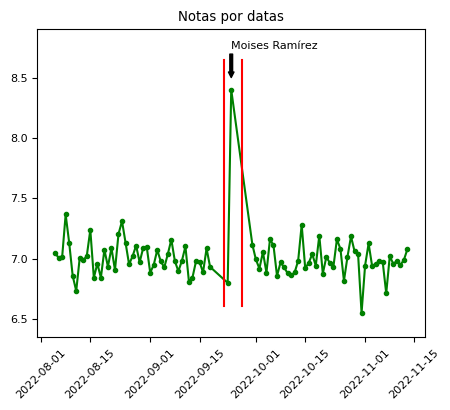

In [43]:
# evolução das medias por dia(Geral)
df_gb_data = df.groupby(df.Data)
media_notas_por_data = df_gb_data["Nota"].mean()
plt.plot(media_notas_por_data, color = 'g', marker = '.')
datas_fifa = [datetime(2022,9,22), datetime(2022,9,27)] #"Início data fifa" e "Fim data fifa"

dia = datetime(2022,9,24)
plt.annotate("Moises Ramírez", xy = (dia, 8.5), xytext = (dia, 8.8), 
                arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 4),
                horizontalalignment = 'left', verticalalignment = 'top')

[plt.axvline(i, 0.1, 0.9, color = 'r') for i in datas_fifa]

plt.xticks(rotation = 45)
plt.ylim(media_notas_por_data.min() - 0.2, media_notas_por_data.max() + 0.5)
plt.title("Notas por datas")
plt.show()

In [8]:
# Verificando origem do outlier superior
data_fifa_inicio = df[df.Data > datetime(2022,9,22)]
data_fifa_inicio[data_fifa_inicio.Data < datetime(2022,9,29)]

,Data,Partida,Nome,Nota,Area,Posição,Min,Gols,Assist.,Pênalti recebido,...,Bolas recuperadas,Vitória em duelos por baixo,Vitória em duelos por cima,Defesas,Gols sofridos,Pênalti defendido,Reposição de soco,Erros que terminaram em chute adversário,Defesa pelo alto,Seleção
7785,2022-09-23,Puebla 2x1 Pumas,Daniel Alves,6.8,Defesa,Lateral Direito,90,0,0,0.0,...,1/3 (33.3%),0,0,0.0,0.0,0,0.0,0.0,0.0,Brasil
8524,2022-09-24,Independiente del Valle 1x0 Macara,Moises Ramírez,8.4,Defesa,Goleiro,90,0,0,0.0,...,0,0,0,5.0,0.0,0,2.0,0.0,0.0,Equador


É perceptível uma média de notas que se comporta como um outlier durante o período Fifa, período em que as principais ligas europeias não jogam. Esse outlier ocorreu porque um jogador equatioriano teve uma grande performance no dia em questão, enquanto ninguem mais jogava.

In [9]:
# Verificando origem do outlier inferior
df[df.Data == media_notas_por_data.sort_values().index[0]]

,Data,Partida,Nome,Nota,Area,Posição,Min,Gols,Assist.,Pênalti recebido,...,Bolas recuperadas,Vitória em duelos por baixo,Vitória em duelos por cima,Defesas,Gols sofridos,Pênalti defendido,Reposição de soco,Erros que terminaram em chute adversário,Defesa pelo alto,Seleção
1150,2022-10-31,Elche 0x1 Getafe,Stefan Mitrovic,7.1,Defesa,Zagueiro Central,90,0,0,0.0,...,0,0/1 (0%),1/2 (50%),0.0,0.0,0,0.0,0.0,0.0,Sérvia
1151,2022-10-31,Elche 0x1 Getafe,Nemanja Maksimovic,6.8,Ataque,Meio de Campo Central,58,0,0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,Sérvia
2435,2022-10-31,Hellas Verona 1x3 AS Roma,Rui Patricio,6.5,Defesa,Goleiro,90,0,0,0.0,...,0,0,0,2.0,1.0,0,0.0,0.0,0.0,Portugal
2436,2022-10-31,Hellas Verona 1x3 AS Roma,Nicola Zalewski,6.5,Defesa,Lateral Esquerdo,56,0,0,0.0,...,1/4 (25%),0,0,0.0,0.0,0,0.0,0.0,0.0,Polônia
2974,2022-10-31,Monza 1x2 Bologna,Lukasz Skorupski,6.5,Defesa,Goleiro,90,0,0,0.0,...,0,0,0,2.0,1.0,0/1,0.0,0.0,0.0,Polônia
2975,2022-10-31,Monza 1x2 Bologna,Michel Aebischer,5.7,Ataque,Meio de Campo Central,62,0,0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,Suíça
5978,2022-10-31,Hellas Verona 1x3 AS Roma,Martin Hongla,6.1,Ataque,Meio de Campo Central,85,0,0,0.0,...,1/2 (50%),6/8 (75%),2/3 (66%),0.0,0.0,0,0.0,0.0,0.0,Camarões
6991,2022-10-31,Sivasspor 0x2 Antalyaspor,Haji Wright,7.2,Ataque,Centroavante,81,1,0,0.0,...,0,5/9 (55%),3/8 (37%),0.0,0.0,0,0.0,0.0,0.0,EUA


O 'outlier' inferior não é provocada por dados isolados, mas sim performances abaixo da média por certos jogadores

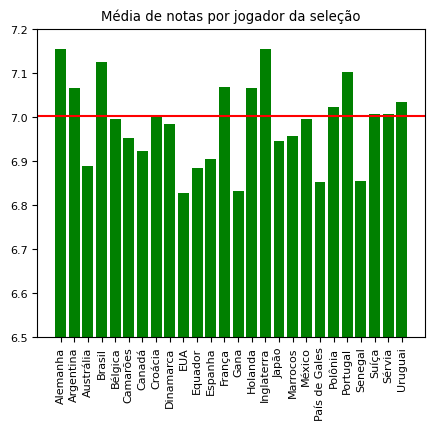

In [10]:
# Media da nota de jogadores de cada seleção
barplot_media(df, "Seleção", "Nota", "Média de notas por jogador da seleção",(6.5,7.2))

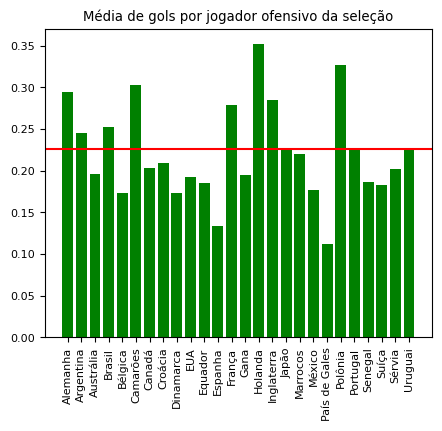

In [11]:
# Média de gols por jogador ofensivo de cada seleção
barplot_media(df[df.Area == 'Ataque'], "Seleção", "Gols", "Média de gols por jogador ofensivo da seleção")

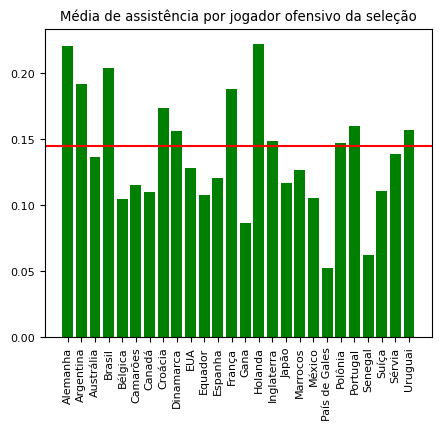

In [12]:
# Média de assistências por jogador ofensivo de cada seleção
barplot_media(df[df.Area == 'Ataque'], "Seleção", "Assist.", "Média de assistência por jogador ofensivo da seleção")

# Clusterização de Dados

**Seleções tadicionais** serão aquelas que tiveram pelo menos duas aparições na fase de mata-mata entre 2010 e 2018, todos os campeões desde 1994 apareceram em pelo menos 2 dos últimos 3 mata-matas 

**Ultimo Mata Mata** desde 1994, ano que a copa adquiriu o formato que temos hoje, todo campeão participou da fase Mata-Mata da copa anterior

**Campeões** seleções campeãs da copa até 2018

**Campeões recente** seleções campeãs após a copa de 1994

In [13]:
TRADICIONAIS = set(["Alemanha", "Argentina", "Brasil", "Bélgica",
                        "EUA", "Espanha", "França", "Holanda", "Inglaterra", "Japão",
                        "México", "Portugal", "Suíça", "Uruguai"])

ULTIMO_MM = set(["Argentina", "Brasil", "Bélgica", "Croácia", "Dinamarca", "Espanha", "França", 
                   "Inglaterra", "Japão", "México", "Portugal", "Suíça", "Uruguai"])

CAMPEOES = set(["Alemanha", "Argentina", "Brasil", "Espanha", "França", "Inglaterra", "Uruguai"])

#CAMPEOES_RECENTES = set(["Alemanha", "Brasil", "Espanha", "França"])

In [14]:
resto = TRADICIONAIS.difference(ULTIMO_MM)
provaveis_campeoes = TRADICIONAIS.intersection(ULTIMO_MM)
pc_nao_campeoes = provaveis_campeoes.difference(CAMPEOES)
pc_campeoes = provaveis_campeoes.intersection(CAMPEOES)

In [15]:
df_provaveis_campeoes = df.query(f"Seleção in {list(provaveis_campeoes)}")

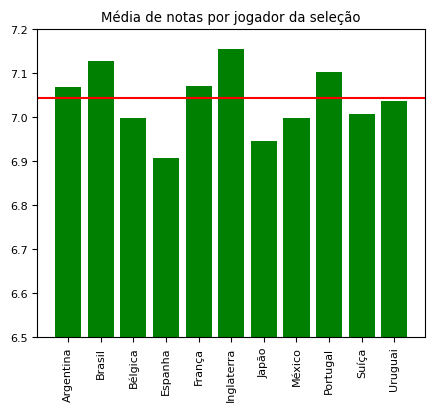

In [16]:
barplot_media(df_provaveis_campeoes, "Seleção", "Nota", "Média de notas por jogador da seleção",(6.5,7.2))

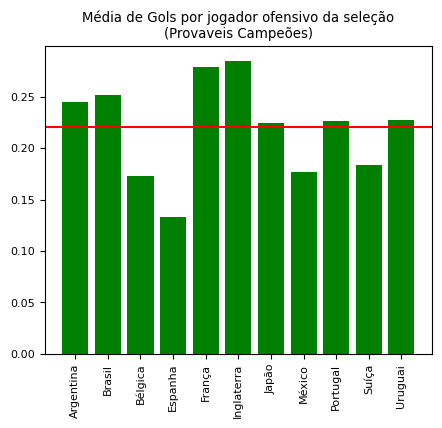

In [30]:
barplot_media(df_provaveis_campeoes.query("Area == 'Ataque'"), "Seleção", "Gols",
               "Média de Gols por jogador ofensivo da seleção\n(Provaveis Campeões)")

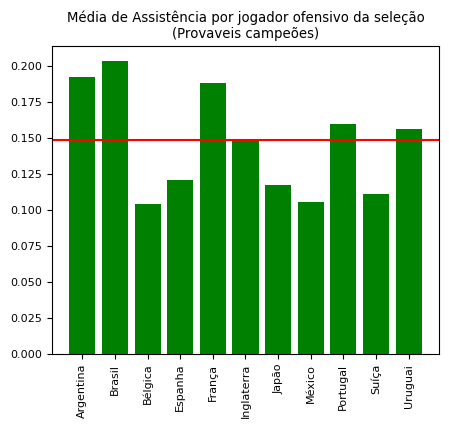

In [29]:
barplot_media(df_provaveis_campeoes.query("Area == 'Ataque'"), "Seleção", "Assist.",
               "Média de Assistência por jogador ofensivo da seleção\n(Provaveis campeões)")

In [19]:
def grupo_acdm(df:pd.DataFrame, coluna_grupo:str, coluna_parametro:str, quer:str=None):
    if quer:
        df = df.query(quer)
    grouped_media = df.groupby(coluna_grupo)[coluna_parametro].mean()
    media_geral = df[coluna_parametro].mean()
    return set(grouped_media[grouped_media >= media_geral].index)

In [24]:
melhor_q_media = provaveis_campeoes
for i,j in [("Nota", None), ("Gols", "Area == 'Ataque'"), ("Assist.", "Area == 'Ataque'")]:
    conj = grupo_acdm(df_provaveis_campeoes, "Seleção", i, j)
    melhor_q_media = melhor_q_media.intersection(conj)
print(melhor_q_media)

{'França', 'Portugal', 'Inglaterra', 'Brasil', 'Argentina'}


Assim obtemos não só os times que tem respaldo histórica para ganhar, os provaveis campeões, também obtemos os times que são a cima da média nas, provavelmente, 3 principais métricas individuais do futebol. Considerando que a Copa do Mundo é um torneio de altissímo nível, acreditamos que os jogadores campeões devem estar melhores que os demais.

In [31]:
df_melhores = df.query(f"Seleção in {list(melhor_q_media)}")

In [52]:
def variacao_por(df:pd.DataFrame, coluna_parametro:str, grupos:set, titulo:str) -> None:
    for selecao in grupos:
        plt.plot(df.query(f"Seleção == '{selecao}'").groupby(df_melhores.Data.dt.month)[coluna_parametro].mean(), label = selecao)
    plt.legend()
    plt.title(titulo)
    plt.show()

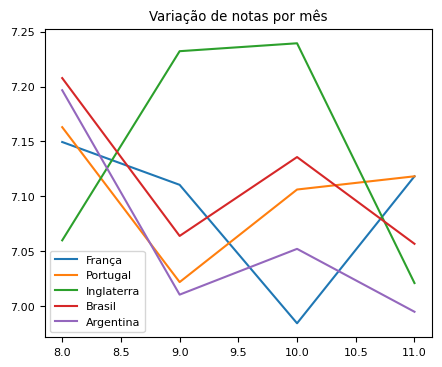

In [53]:
variacao_por(df_melhores, "Nota", melhor_q_media, "Variação de notas por mês")

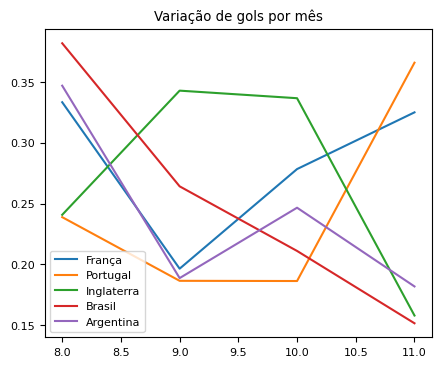

In [55]:
variacao_por(df_melhores.query("Area == 'Ataque'"), "Gols", melhor_q_media, "Variação de gols por mês")

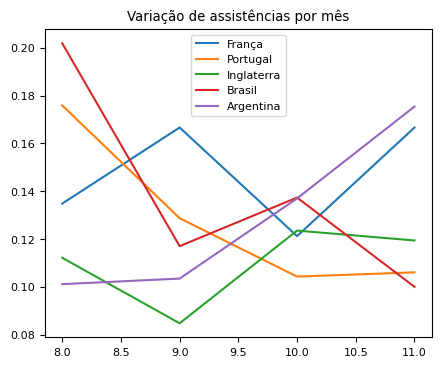

In [56]:
variacao_por(df_melhores, "Assist.", melhor_q_media, "Variação de assistências por mês")